In [17]:
import pandas as pd
import numpy as np

filename = 'BRAZPD_UnofM_all.csv'

df = pd.read_csv(filename, engine='python')


In [18]:
display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,Diastolic70,Systolic71,Diastolic71,Systolic72,Diastolic72,Systolic73,Diastolic73,Systolic74,Diastolic74,_merge
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Data Cleaning

In [19]:
import re

nMeasurements = 75
nColumns = 1735
nRecords = 5707
timeseries_names = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'Systolic', 'Diastolic', 'N_AH_']

different_format_ts_names = ['Mes_1_PAS', 'Mes_1_PAD', 'Mes_1_Uso_de_anti_hipert', 'Mes_1_inibidor',\
                             'Mes_1_beta', 'Mes_1_ant', 'Mes_1_diu', 'Mes_1_at_i', 'Mes_1_OUTROS']

# Put timeseries names into standard format
p = re.compile('[0-9]')
strip = re.compile('Mes_[0-9]_')
for timeseries in different_format_ts_names:
    for i in range(1,nMeasurements):
        try:
            old_label = p.sub(str(i), timeseries)
            new_label = strip.sub('',timeseries)
            df[new_label+str(i)] = pd.Series(df[old_label])
            df.drop([old_label],axis=1, inplace=True)
        except:
            print(f'Column {timeseries}{i} does not exist')
    timeseries_names.append(new_label)
    
# make sure we don't have duplicate columns
assert nColumns == df.shape[1]

display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,OUTROS65,OUTROS66,OUTROS67,OUTROS68,OUTROS69,OUTROS70,OUTROS71,OUTROS72,OUTROS73,OUTROS74
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,0,0,0,0,0,0,0,0,0,0
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,0,0,0,0,0,0,0,0,0,0
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [20]:
display(df[df['CODPAX']==1349040]['Age'])
display(df[df['CODPAX']==1349040]['Agedic65'])
display(df[df['CODPAX']==1349040]['BMI'])
display(df[df['CODPAX']==1349040]['BMI_Cat'])



1    23.3
Name: Age, dtype: float64

1    0
Name: Agedic65, dtype: int64

1    28.3
Name: BMI, dtype: float64

1    3
Name: BMI_Cat, dtype: int64

# Feature Selection and Combination

In [21]:
# Separate features to unique features and time series features
timeseries_cols = []
time_indices = str(np.arange(100))
# print(time_indices)
for col in list(df.columns):
    add = True
    for idx in time_indices:
        if idx in col:
            add = False
    if add == False:
        timeseries_cols.append(col)
        
# Adjust missclassified features
adjlist = ['ModalidadeCAPD0APD1Mix2', 'Dropoutsim1', 'Agedic65', 'Educationdic4y', 
           'Followup1y', 'Followup2y', 'Followup3y', "death_event_1y","Tech_event_1y",
          "death_event_2y","Tech_event_2y", "death_event_3y","Tech_event_3y"]
for i in range(len(adjlist)):
    timeseries_cols.remove(adjlist[i])
    
unique_cols = ['Hemoglobin', 'Potassium', 'Phosphate',\
                 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2',\
                'CenterSizenpatients', 'ModalidadeDPInicial', 'Age',\
                'BMI','IncidentinPD', 'PrevalentinPDNet', \
                'DialysisvintageprePDNet', 'totaldialysisvintage',\
                'Educationlevel', 'Primaryrenaldisease', 'PreviousHD',\
                'Previoustx', 'DaviesScore', 'Peripheralarterydisease',\
                'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke',\
                'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Race',\
                'Familyincome', 'Distancefromcenter', 'predialysiscare',\
                'timeofpredialysiscare', 'Racedicwhite', 'Educationdic4y',\
                'Daviesdic', 'Incomesdic', 'Region', 'Centerexperiencepatientyear',\
                'Regionsdic', 'cidade']

print(unique_cols)
print(timeseries_cols)

['Hemoglobin', 'Potassium', 'Phosphate', 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2', 'CenterSizenpatients', 'ModalidadeDPInicial', 'Age', 'BMI', 'IncidentinPD', 'PrevalentinPDNet', 'DialysisvintageprePDNet', 'totaldialysisvintage', 'Educationlevel', 'Primaryrenaldisease', 'PreviousHD', 'Previoustx', 'DaviesScore', 'Peripheralarterydisease', 'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke', 'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Race', 'Familyincome', 'Distancefromcenter', 'predialysiscare', 'timeofpredialysiscare', 'Racedicwhite', 'Educationdic4y', 'Daviesdic', 'Incomesdic', 'Region', 'Centerexperiencepatientyear', 'Regionsdic', 'cidade']
['Mean_PAS_1T', 'Mean_PAD_1T', 'Mean_PAS_2T', 'Mean_PAD_2T', 'Mean_PAS_3T', 'Mean_PAD_3T', 'Mean_PAS_4T', 'Mean_PAD_4T', 'Mean_PAS_5T', 'Mean_PAD_5T', 'Mean_PAS_6T', 'Mean_PAD_6T', 'Mean_PAS_7T', 'Mean_PAD_7T', 'Mean_PAS_8T', 'Mean_PAD_8T', 'CR_death_event_1y', 'CR_death_event_2y', 'CR_death_event_3y', 'Group_2T', 'Group_3T', 'Ureia

In [22]:
# build baseline dataframe (without time-series data):
df_baseline = df[unique_cols].copy()
df_baseline = df_baseline.fillna(0)
# display(df_baseline)

targets = ['Dropoutsim1', 'Followup1y', 'Followup2y', 'Followup3y',\
           "death_event_1y","Tech_event_1y",\
           "death_event_2y","Tech_event_2y",\
           "death_event_3y","Tech_event_3y",\
           "Deathevent","TechniqueFailureevent","Causeofdeath","TechFailureDeathnotcens","Causeofdropout",\
           "Followup"]

# build targets dataframe:
Y = df[targets+['CODPAX']].copy()
# display(Y)

In [23]:
df_totalaverage = df[unique_cols].copy()

Group_p1 = []
Ms10ou_p1 = []

storage_p1 = [Group_p1, Ms10ou_p1]

Mean_PAS_p1 = []
Mean_PAD_p1 = []

Mean_PAS_p2 = []
Mean_PAD_p2 = []

storage_p2 = [Mean_PAS_p1, Mean_PAD_p1, Mean_PAS_p2, Mean_PAD_p2]

Ureia = dict()
Creatinine = dict()
TGP = dict()
Potassium = dict()
Calcium = dict()
Phosphate = dict()
Glucose = dict()
Hemoglobin = dict()
Hematocrit = dict()
Volume_Total = dict()
N_AH_ = dict()
Systolic = dict()
Diastolic = dict()
PAS = dict()
PAD = dict()
Uso_de_anti_hipert = dict()
inibidor = dict()


# label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
#               Hemoglobin, Hematocrit, Volume_Total, N_AH_, Systolic, Diastolic, PAS, PAD, Uso_de_anti_hipert, inibidor]

# label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
#               'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic','PAS','PAD',
#              'Uso_de_anti_hipert', 'inibidor']

# remove Volume_Total and N_AH_

label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
              Hemoglobin, Hematocrit, Systolic, Diastolic, PAS, PAD, Uso_de_anti_hipert, inibidor]

label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit', 'Systolic', 'Diastolic','PAS','PAD',
             'Uso_de_anti_hipert', 'inibidor']

for item in label_dict:
    for i in range(13):
        key = 'p'+str(i+1)
        item[key] = []
    
label_idx = 0    
for item in label_dict:
    count = 0
    section = 1
    labelname = label_str[label_idx]
    for col in timeseries_cols:
        if labelname in col:
            if 'Mean_' not in col:            
                if count < 6:
                    count = count + 1
                else:
                    section = section + 1
                    count = 1
                key = 'p'+str(section)
                item[key].append(col)
    label_idx = label_idx + 1

indices_p1 = ['Group', 'Ms10ou']

indices_p2 = ['Mean_PAS', 'Mean_PAD']



# Select certain features as 1 section
for col in timeseries_cols:
    i = 0
    for idx in indices_p1:
        if idx in col:
            storage_p1[i].append(col)
        i = i + 1
# print(storage_p1)

# Separate certain features to 2 sections (each section contains 4 features)
i = 0 # i is the index of feature name
for idx in indices_p2:
    p = 0
    count = 0
    for col in timeseries_cols:
        if idx in col:
            if count < 4:
                storage_p2[i+2*p].append(col)
                count = count + 1
            else:
                count = 0
                p = p + 1
                storage_p2[i+2*p].append(col)
                count = count + 1
    i = i + 1

for i in range(len(indices_p1)):
    df_totalaverage.loc[:,indices_p1[i]] = df[storage_p1[i]].mean(axis=1)

for i in range(len(indices_p2)):
    for p in range(2):
        name = indices_p2[i] + '_p' + str(p+1)
        df_totalaverage.loc[:,name] = df[storage_p2[i+2*p]].mean(axis=1)       

label_idx = 0
for item in label_dict:
    for p in range(13):
        name = label_str[label_idx] + '_p' + str(p+1)
        df_totalaverage.loc[:,name] = df[item['p'+str(p+1)]].mean(axis=1)
    label_idx = label_idx + 1
        
    
df_totalaverage = df_totalaverage.fillna(0)
display(df_totalaverage)


,Hemoglobin,Potassium,Phosphate,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,ModalidadeDPInicial,Age,BMI,...,inibidor_p4,inibidor_p5,inibidor_p6,inibidor_p7,inibidor_p8,inibidor_p9,inibidor_p10,inibidor_p11,inibidor_p12,inibidor_p13
0,12.933333,4.433333,5.300000,0,1,0,128,0.0,71.2,20.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.000000,3.766667,5.933333,0,1,0,128,0.0,23.3,28.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.833333,4.366667,6.100000,1,1,1,128,1.0,49.2,31.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.066667,4.733333,5.533333,1,1,0,128,0.0,48.3,27.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.933333,4.033333,4.066667,0,1,2,128,0.0,93.7,23.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,1,347,1,66,1.0,31.8,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,9.700000,4.300000,3.233333,1,347,1,66,1.0,57.0,21.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,10.466667,4.433333,4.466667,1,347,1,66,1.0,84.0,23.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,11.766667,4.533333,3.566667,1,347,1,66,1.0,54.2,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[(1, 18.52111442088663), (0, 81.47888557911337)]
[(5.0, 34.53169347209082), (7.0, 10.785241248817409), (4.0, 9.271523178807946), (1.0, 36.14001892147588), (2.0, 7.473982970671712), (3.0, 1.608325449385052), (6.0, 0.1892147587511826)]
[(10, 51.28578360019408), (2, 19.068413391557495), (1, 5.434255215914605), (8, 0.727802037845706), (6, 4.9490538573508), (3, 5.870936438622028), (4, 5.628335759340127), (7, 3.6875303250849103), (5, 3.3478893740902476)]


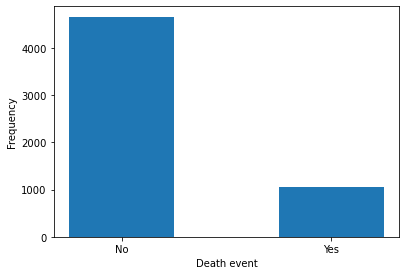

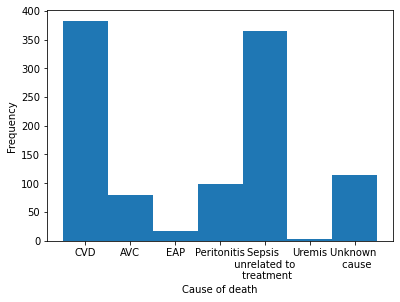

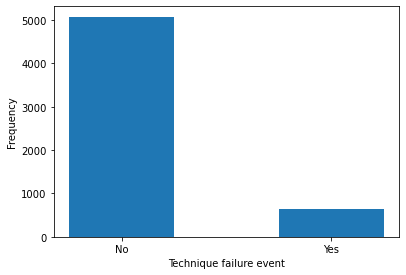

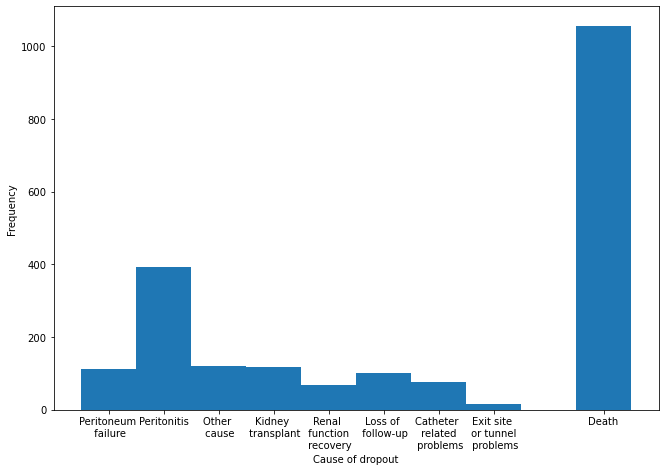

In [24]:
from matplotlib import pyplot as plt
import collections

fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
Y['Deathevent'].plot.hist(bins=3,range=(-0.25, 1.25))
ax.set_xticks([0,1])
ax.set_xticklabels(['No','Yes'])
ax.set_xlabel('Death event')

death_event_collection = collections.Counter(Y['Deathevent'])
death_event_percentage = [(i, death_event_collection[i] / len(Y['Deathevent']) * 100.0) for i in death_event_collection]
print(death_event_percentage)


fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
Y[Y['Deathevent']==1]["Causeofdeath"].plot.hist(bins=7,range=(0.5, 7.5))
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(['CVD','AVC','EAP','Peritonitis','Sepsis \n unrelated to \n treatment','Uremis','Unknown \n cause'])
ax.set_xlabel('Cause of death')

causeofdeath_event_collection = collections.Counter(Y[Y['Deathevent']==1]["Causeofdeath"])
causeofdeath_event_percentage = [(i, causeofdeath_event_collection[i] / len(Y[Y['Deathevent']==1]["Causeofdeath"]) * 100.0) for i in causeofdeath_event_collection]
print(causeofdeath_event_percentage)

fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
Y['TechniqueFailureevent'].plot.hist(bins=3,range=(-0.25, 1.25))
ax.set_xticks([0,1])
ax.set_xticklabels(['No','Yes'])
ax.set_xlabel('Technique failure event')

fig = plt.figure()
ax = fig.add_axes([0, 0, 1.4, 1.4]) # main axes
Y[Y['Dropoutsim1']==1]["Causeofdropout"].plot.hist(bins=10,range=(0.5, 10.5))
ax.set_xticks([1,2,3,4,5,6,7,8,10])
ax.set_xticklabels(['Peritoneum \n failure','Peritonitis','Other \n cause','Kidney \n transplant','Renal \n function \n recovery','Loss of \n follow-up','Catheter \n related \n problems','Exit site \n or tunnel \n problems','Death'])
ax.set_xlabel('Cause of dropout')

causeofdropout_collection = collections.Counter(Y[Y['Dropoutsim1']==1]["Causeofdropout"])
causeofdropout_percentage = [(i, causeofdropout_collection[i] / len(Y[Y['Dropoutsim1']==1]["Causeofdropout"]) * 100.0) for i in causeofdropout_collection]
print(causeofdropout_percentage)

# Predicting binary outcomes use 6-month average time-series data (using XGBoost):

* Deathevent   
* TechniqueFailureevent

Target: Deathevent, mean accuracy: 0.8128624075418527,
           mean F1 score: 0.29171254657839746, mean Recall: 0.2071850129661093, mean Precision: 0.4927418047690314


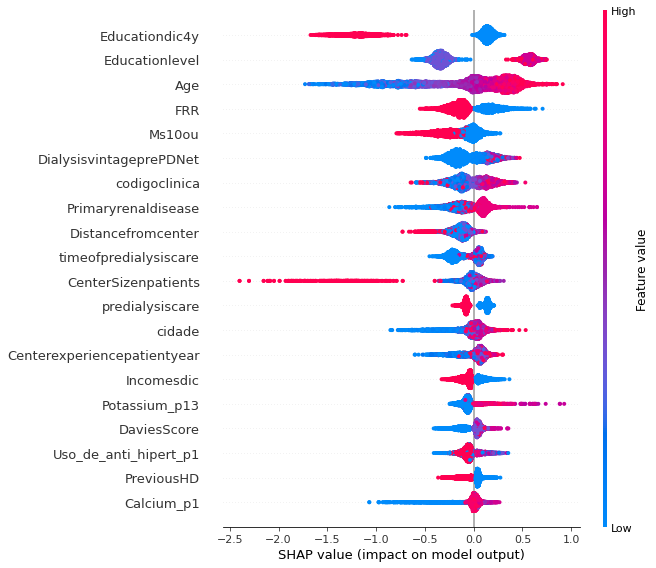

Target: TechniqueFailureevent, mean accuracy: 0.8826004472679664,
           mean F1 score: 0.0232248911991853, mean Recall: 0.012355396541443053, mean Precision: 0.1931168831168831


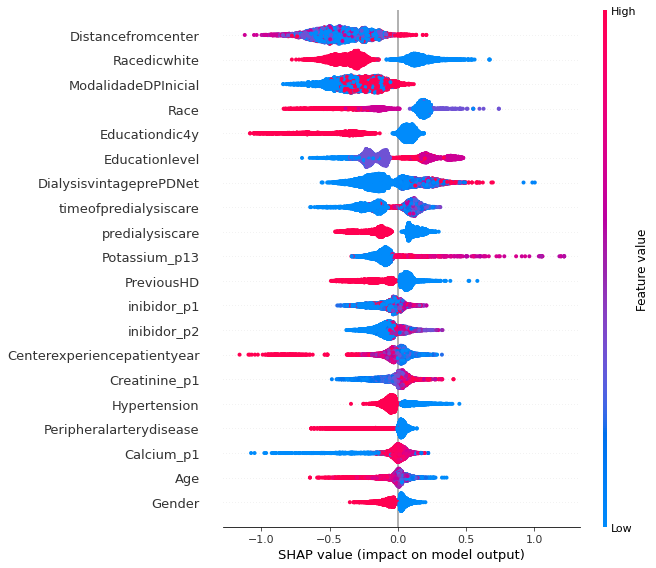

In [25]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
#     print("X shape before feature selection: ", X.shape)
    
    # apply feature selection on data
    # remove constant columns
#     constant_indices = [12, 13, 68, 81, 94, 120, 146, 159, 172, 185, 198, 211, 224, 237, 250, 263, 276]
#     constant_indices.reverse()
#     for idx in constant_indices:
#         X = X.drop(X.columns[idx], axis=1)
#     X = (f_classif, k=32).fit_transform(X, y)
#     print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
#         X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
        #comment if apply feature selection
#         X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
#         X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate = 0.05,
            max_depth = 8,
            min_child_weight = 5)
        model.fit(X_train_sm, y_train_sm)
#         model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        # print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")

        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
#     X_test = X[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
          mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)


In [9]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Predicting binary outcomes use 6-month average time-series data (using neural networks):

* Deathevent   
* TechniqueFailureevent

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
#     print("X shape before feature selection: ", X.shape)
    
#     # apply feature selection on data
#     # remove constant columns
#     constant_indices = [12, 13, 68, 81, 94, 120, 146, 159, 172, 185, 198, 211, 224, 237, 250, 263, 276]
#     constant_indices.reverse()
#     for idx in constant_indices:
#         X = X.drop(X.columns[idx], axis=1)
#     X = SelectKBest(f_classif, k=32).fit_transform(X, y)
#     print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
#         X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
#         X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
#         X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
        
        history = model.fit(
            X_train_sm,
            y_train_sm,
            epochs=200,
            verbose=0
        )
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.24242424242424246, Recall: 0.18867924528301888, Precision: 0.3389830508474576
F1 score: 0.3970588235294118, Recall: 0.5094339622641509, Precision: 0.3253012048192771
F1 score: 0.32489451476793246, Recall: 0.36492890995260663, Precision: 0.29277566539923955
F1 score: 0.38202247191011235, Recall: 0.4834123222748815, Precision: 0.3157894736842105
F1 score: 0.30997876857749473, Recall: 0.3459715639810427, Precision: 0.28076923076923077
Target: Deathevent, mean accuracy: 0.7278713636454335,
         mean F1 score: 0.3412733847815071, mean Recall: 0.3784852007511401, mean Precision: 0.31072372510388313
F1 score: 0.15217391304347827, Recall: 0.16153846153846155, Precision: 0.14383561643835616
F1 score: 0.17283950617283952, Recall: 0.16153846153846155, Precision: 0.18584070796460178
F1 score: 0.09701492537313433, Recall: 0.10077519379844961, Precision: 0.09352517985611511
F1 score: 0.14935064935064934, Recall: 0.17829457364341086, Precision: 0.12849162011173185
F1 score: 0.20795107

# Predicting binary outcomes use 6-month average time-series data (using Dummy Classifier):

* Deathevent   
* TechniqueFailureevent

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
#     print("X shape before feature selection: ", X.shape)
    
#     # apply feature selection on data
#     # remove constant columns
#     constant_indices = [12, 13, 68, 81, 94, 120, 146, 159, 172, 185, 198, 211, 224, 237, 250, 263, 276]
#     constant_indices.reverse()
#     for idx in constant_indices:
#         X = X.drop(X.columns[idx], axis=1)
#     X = SelectKBest(f_classif, k=32).fit_transform(X, y)
#     print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
#         X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train tensorflow neural networks model
        model = DummyClassifier(strategy="stratified")
        model.fit(X_train_sm, y_train_sm)
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.25575447570332477, Recall: 0.4716981132075472, Precision: 0.17543859649122806
F1 score: 0.2853598014888338, Recall: 0.5424528301886793, Precision: 0.1936026936026936
F1 score: 0.2448979591836735, Recall: 0.4549763033175355, Precision: 0.16753926701570682
F1 score: 0.2673392181588903, Recall: 0.5023696682464455, Precision: 0.18213058419243985
F1 score: 0.27400768245838664, Recall: 0.5071090047393365, Precision: 0.18771929824561404
Target: Deathevent, mean accuracy: 0.4922022805447644,
         mean F1 score: 0.2654841620381731, mean Recall: 0.4957211839399088, mean Precision: 0.1812860879095365
F1 score: 0.17877094972067042, Recall: 0.49230769230769234, Precision: 0.10921501706484642
F1 score: 0.1867816091954023, Recall: 0.5, Precision: 0.11484098939929328
F1 score: 0.20249653259361994, Recall: 0.5658914728682171, Precision: 0.12331081081081081
F1 score: 0.1782178217821782, Recall: 0.4883720930232558, Precision: 0.10899653979238755
F1 score: 0.1799709724238026, Recall: 0.480

# Predicting multiclass outcomes (using XGBoost):

* Causeofdeath   
* Causeofdropout

The least populated class in y has only 2 members, which is less than n_splits=5.


Target: Causeofdeath, mean accuracy: 0.37088884914602527,
         mean F1 score: 0.37088884914602527, mean Recall: 0.37088884914602527, mean Precision: 0.37088884914602527


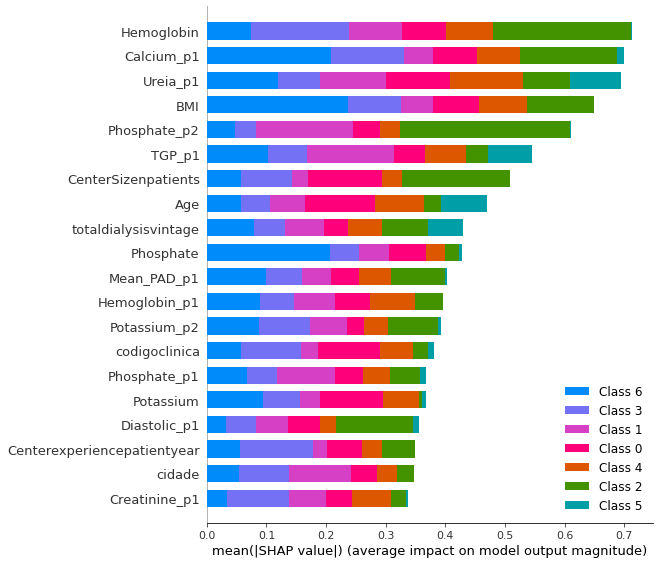

Target: Causeofdropout, mean accuracy: 0.52643574131973,
         mean F1 score: 0.52643574131973, mean Recall: 0.52643574131973, mean Precision: 0.52643574131973


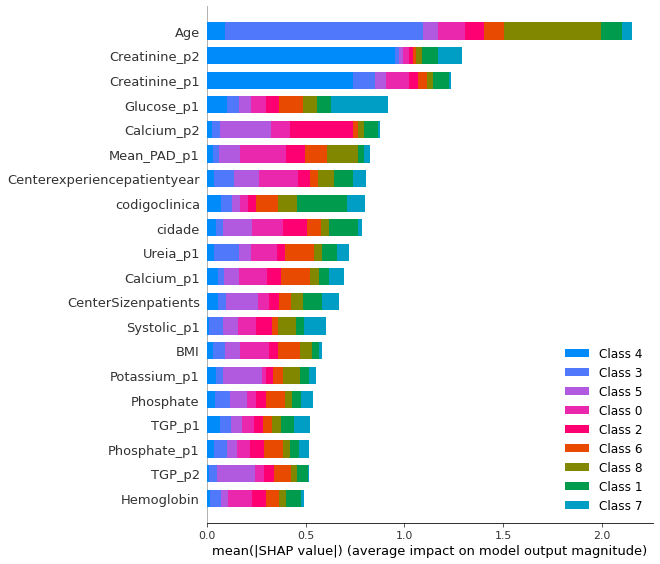

In [13]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=9,
            min_child_weight=4)
        model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        precision = precision_score(y_test, y_pred, average='micro')
#         print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
#         print(f"F1 score: {f1score}")
#         shap.summary_plot(shap_values, X_test)
#         shap_values = np.array(shap_values)
#         print(shap_values.shape)
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)
    new_shap_values = list()
    for i in range(shap_values.shape[0]):
        new_shap_values.append(shap_values[i])
    
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(new_shap_values, X_test)


In [20]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: Causeofdeath, Class: 1.0, mean accuracy: 0.5894348564785836,mean F1 score: 0.35936906919490225,
             mean Recall: 0.3194805194805195, mean Precision: 0.41142234278414663


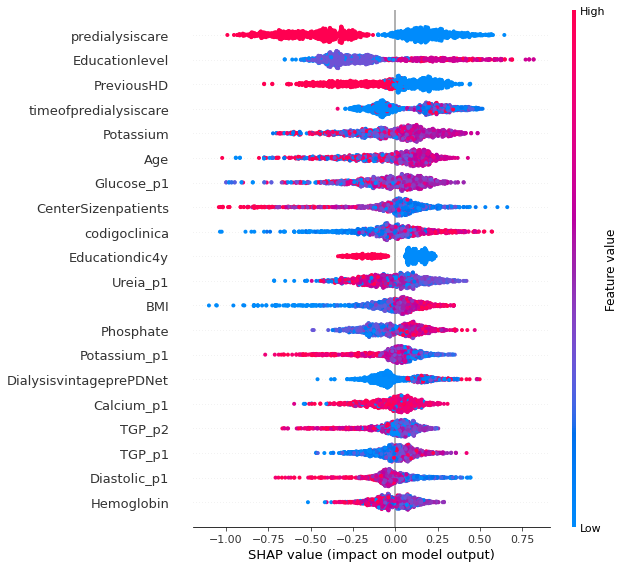

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 2.0, mean accuracy: 0.9214835017437182,mean F1 score: 0.04444444444444444,
             mean Recall: 0.02583333333333333, mean Precision: 0.16666666666666666


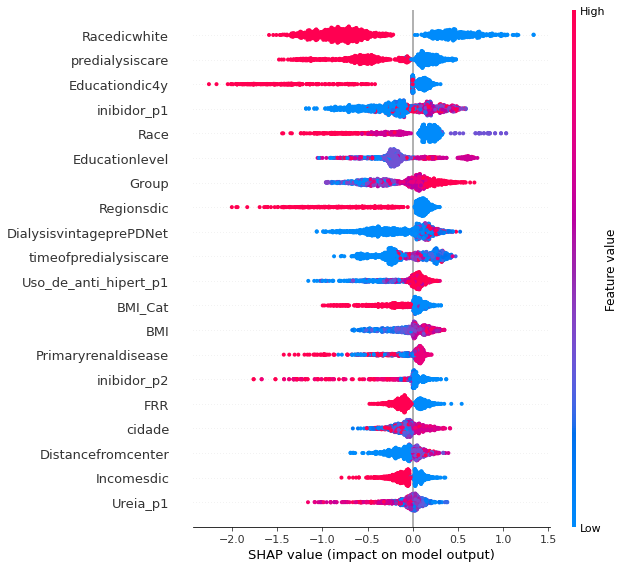

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 3.0, mean accuracy: 0.9773048377000805,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


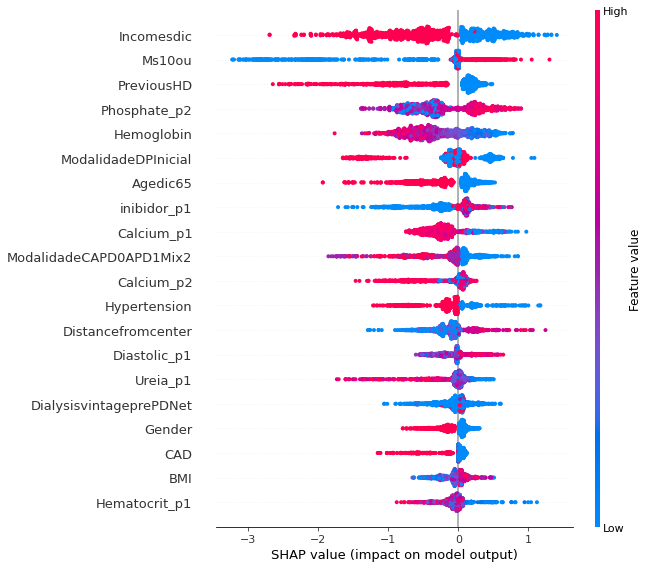

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 4.0, mean accuracy: 0.8874362872216757,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


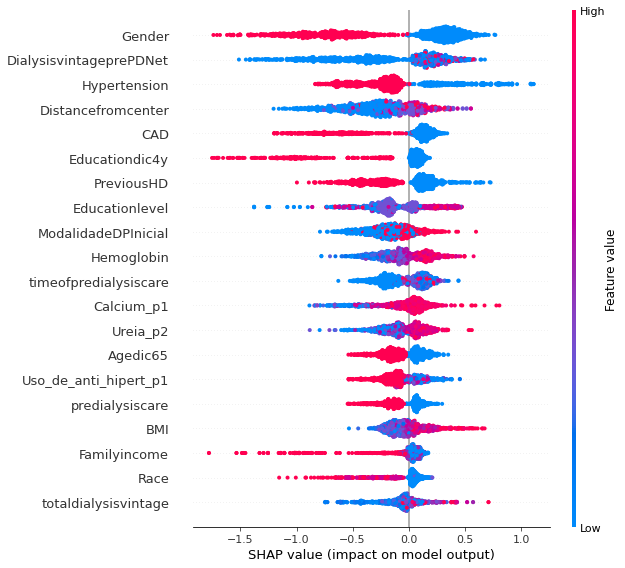

Target: Causeofdeath, Class: 5.0, mean accuracy: 0.5940847715282124,mean F1 score: 0.28400750120647966,
             mean Recall: 0.23561643835616436, mean Precision: 0.3625473042744739


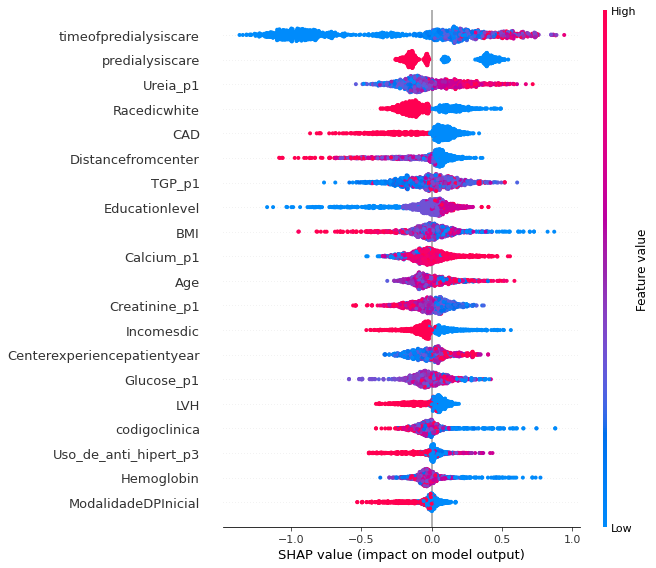

The least populated class in y has only 2 members, which is less than n_splits=5.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 6.0, mean accuracy: 0.9981132075471699,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


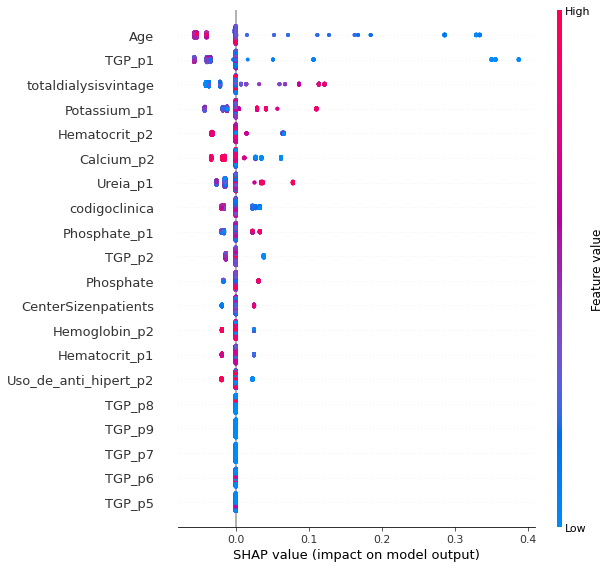

Target: Causeofdeath, Class: 7.0, mean accuracy: 0.880783331842976,mean F1 score: 0.14515588642396204,
             mean Recall: 0.09683794466403162, mean Precision: 0.3178787878787879


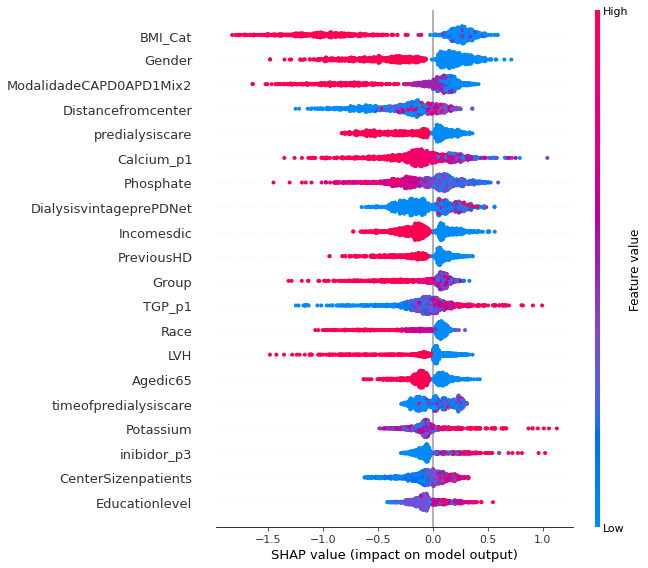

Target: Causeofdropout, Class: 1, mean accuracy: 0.9427490067937658,mean F1 score: 0.1271062271062271,
             mean Recall: 0.08102766798418973, mean Precision: 0.33166666666666667


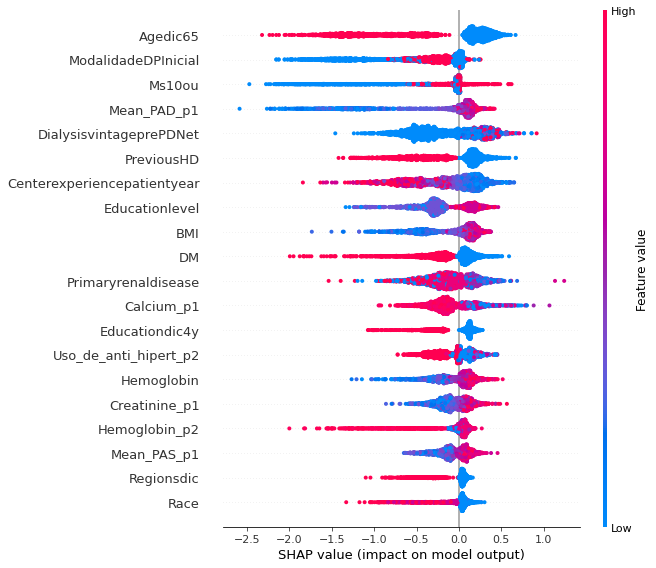

Target: Causeofdropout, Class: 2, mean accuracy: 0.7971955147041538,mean F1 score: 0.19847494553376904,
             mean Recall: 0.13235962349886402, mean Precision: 0.3992253873063468


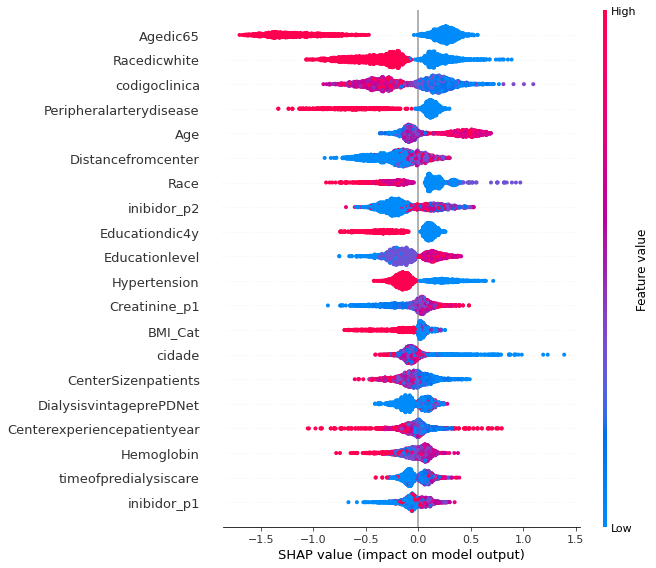

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdropout, Class: 3, mean accuracy: 0.9388643362561414,mean F1 score: 0.029629629629629627,
             mean Recall: 0.016666666666666666, mean Precision: 0.13333333333333333


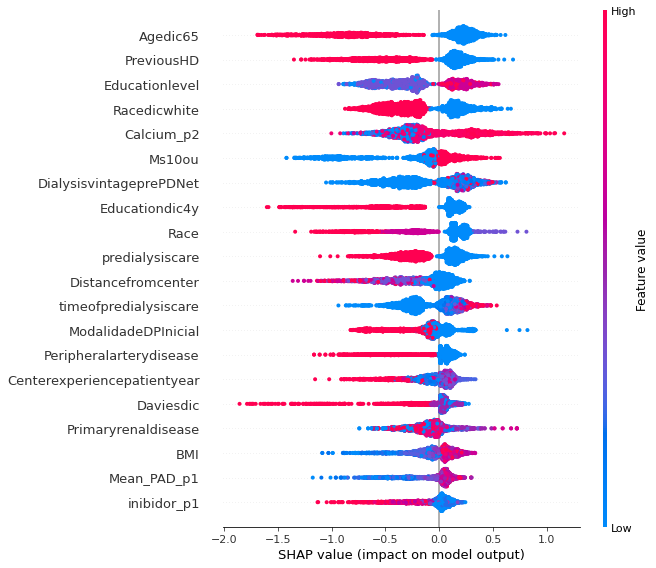

Target: Causeofdropout, Class: 4, mean accuracy: 0.937894637861727,mean F1 score: 0.2648342782088912,
             mean Recall: 0.19855072463768114, mean Precision: 0.4042424242424243


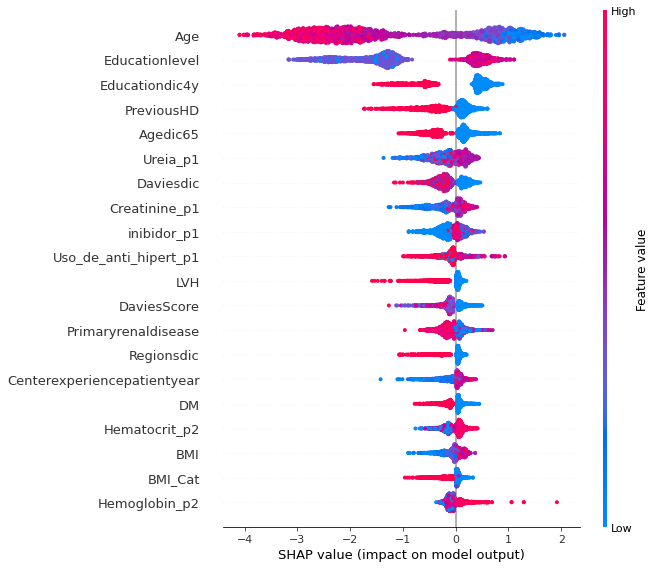

Target: Causeofdropout, Class: 5, mean accuracy: 0.9616681163167918,mean F1 score: 0.18416433239962654,
             mean Recall: 0.13076923076923075, mean Precision: 0.3276190476190476


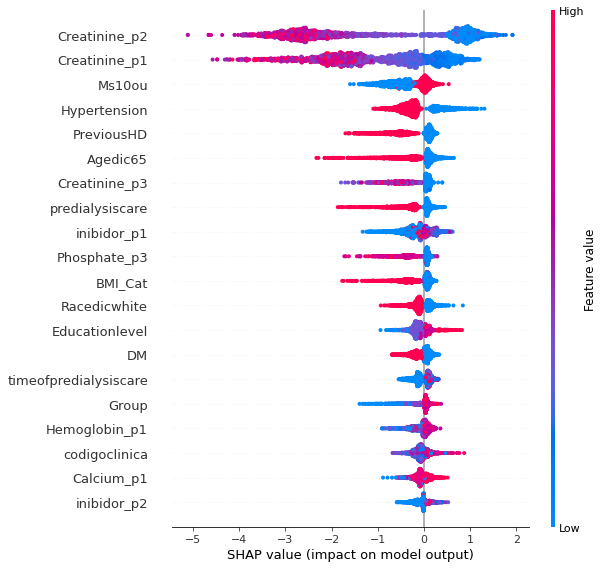

Target: Causeofdropout, Class: 6, mean accuracy: 0.9500270340158444,mean F1 score: 0.16266666666666668,
             mean Recall: 0.09904761904761905, mean Precision: 0.45999999999999996


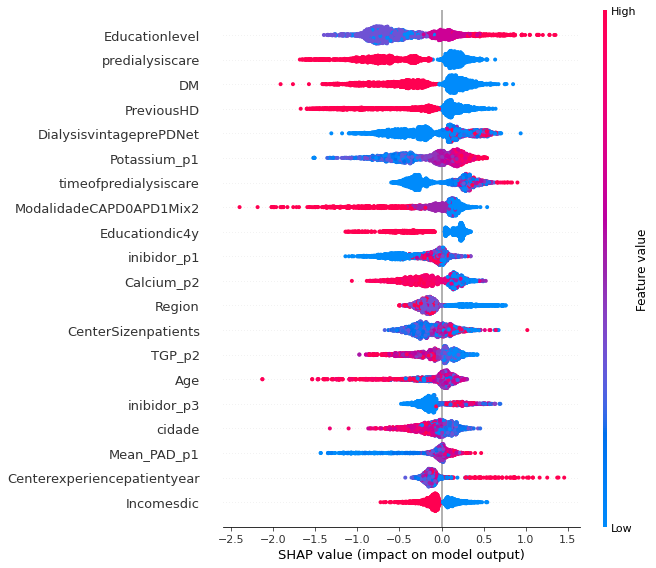

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdropout, Class: 7, mean accuracy: 0.9602153318131597,mean F1 score: 0.02222222222222222,
             mean Recall: 0.013333333333333332, mean Precision: 0.06666666666666667


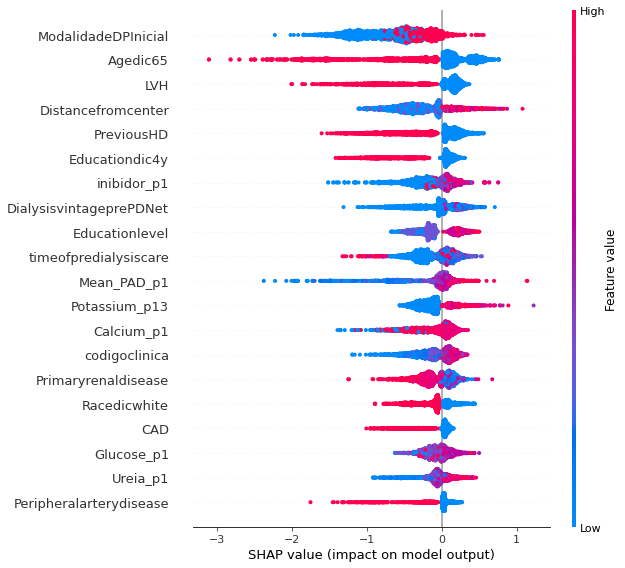

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdropout, Class: 8, mean accuracy: 0.9912656620983098,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


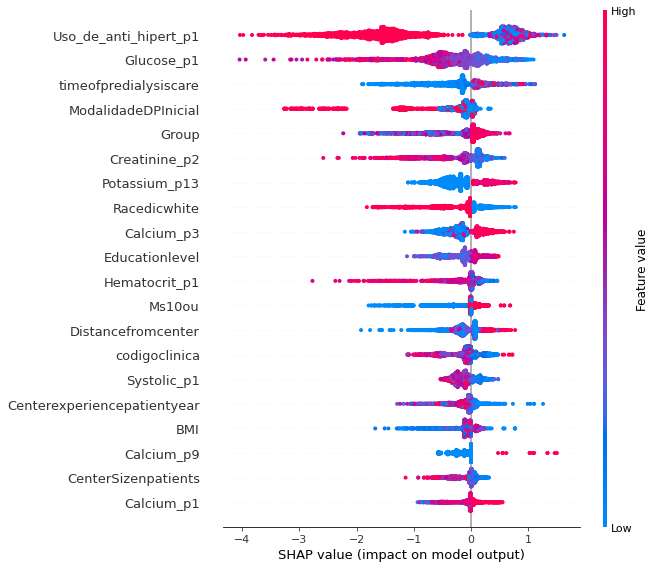

Target: Causeofdropout, Class: 10, mean accuracy: 0.6720068642892405,mean F1 score: 0.6854405766037874,
             mean Recall: 0.6972726459805061, mean Precision: 0.6760672946199902


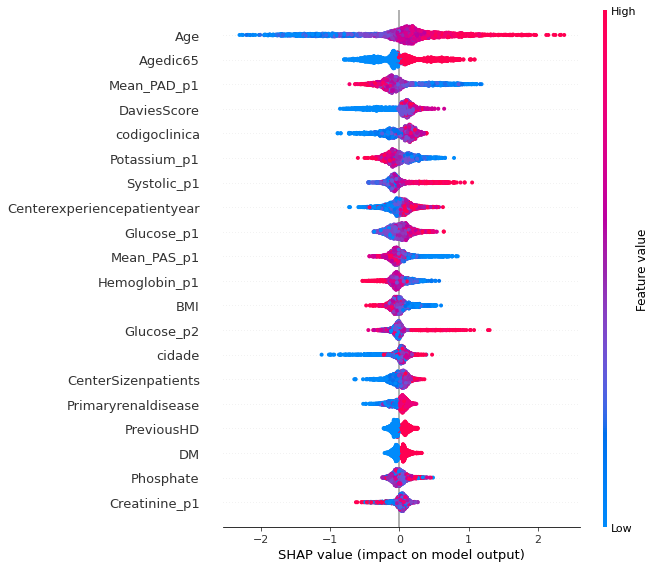

In [14]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []
classnumlist = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    set1 = set(y)
    classnumlist.append(set1)
    
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = -1
        
        # apply k-fold cross validation
        k = 5
        kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

        list_shap_values = list()
        list_test_sets = list()
        list_normalised_accuracy = list()
        list_f1_score = list()
        list_recall = list()
        list_precision = list()
        
        j = 0

        for train_index, test_index in kf.split(X, ybi):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_test = ybi[train_index], ybi[test_index]
            X_train = pd.DataFrame(X_train,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)
            
            if ybi[np.where(ybi == 1)].shape[0] >= 3:

                sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
                X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

                X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
                X_test = pd.DataFrame(X_test,columns=X.columns)

                # train XGBoost model
                model = xgboost.XGBClassifier(
                    learning_rate =0.1,
                    max_depth=9,
                    min_child_weight=4)
                model.fit(X_train_sm, y_train_sm)
            
            else:
                model = xgboost.XGBClassifier(
                    learning_rate =0.1,
                    max_depth=9,
                    min_child_weight=4)
                model.fit(X_train, y_train)

            # use saved model
#             filename = 'models/' + target + '_class' + str(classidx) + '_fold'+ str(j) + '_binary_model.pkl'
#             j = j + 1
#             model = pickle.load(open(filename, 'rb'))


            # explaining model
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
            y_pred = model.predict(X_test)
            normalised_accuracy = accuracy_score(y_test, y_pred)
            f1score = f1_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
#             print(f"F1 score: {f1score}")
#             shap.summary_plot(shap_values, X_test)
#             print(shap_values.shape)

            # for each iteration we save the test_set index and the shap_values
            list_shap_values.append(shap_values)
            list_test_sets.append(test_index)
            list_normalised_accuracy.append(normalised_accuracy)
            list_f1_score.append(f1score)
            list_recall.append(recall)
            list_precision.append(precision)
            models.append(model)

        #combining results from all iterations
        test_set = list_test_sets[0]
        shap_values = np.array(list_shap_values[0])
        for i in range(0,len(list_test_sets)):
            test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
            shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)

        #bringing back variable names    
        X_test = X.iloc[test_set,:]

        mean_normalised_accuracy = np.mean(list_normalised_accuracy)
        mean_f1_score = np.mean(list_f1_score)
        mean_recall = np.mean(list_recall)
        mean_precision = np.mean(list_precision)
        
        print(f"Target: {target}, Class: {classidx}, mean accuracy: {mean_normalised_accuracy},mean F1 score: {mean_f1_score},\n \
            mean Recall: {mean_recall}, mean Precision: {mean_precision}")

        shap.summary_plot(shap_values, X_test)

In [29]:
# Save predictive models
import pickle

i = 0
j = 0
model = None
for target in targets:
    classnum = classnumlist[i]
    for classidx in classnum:
        for ik in range(k):         
            filename = 'models/' + target + '_class' + str(classidx) + '_fold' + str(ik) + '_binary_model.pkl'
            model = models[j]
            with open(filename, 'wb') as file:  
                pickle.dump(model, file)
            j = j + 1
    i = i + 1

# Predicting multiclass outcomes (using neural networks):

* Causeofdeath   
* Causeofdropout

In [37]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []
classnumlist = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    set1 = set(y)
    classnumlist.append(set1)
    
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = 0
        
        # apply k-fold cross validation
        k = 5
        kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

        list_shap_values = list()
        list_test_sets = list()
        list_normalised_accuracy = list()
        list_f1_score = list()
        list_recall = list()
        list_precision = list()
        
        j = 0

        for train_index, test_index in kf.split(X, ybi):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_test = ybi[train_index], ybi[test_index]
            X_train = pd.DataFrame(X_train,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)
            
            if ybi[np.where(ybi == 1)].shape[0] >= 3:

                sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
                X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

                X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
                X_test = pd.DataFrame(X_test,columns=X.columns)

                model = keras.Sequential([
                        keras.layers.Dense(units=32, activation='relu',dtype='float64'),
                        keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
                    ])
        
                model.compile(optimizer='adam', 
                      loss=tf.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])
                history = model.fit(
                    X_train_sm,
                    y_train_sm,
                    epochs=100,
                    verbose=0)                                    
            
            else:
                model = keras.Sequential([
                        keras.layers.Dense(units=32, activation='relu',dtype='float64'),
                        keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
                    ])
        
                model.compile(optimizer='adam', 
                      loss=tf.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])
                history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    verbose=0) 

            # explaining model
            predictions = model.predict(X_test)
            y_pred = list()
            for i in range(len(predictions)):
                if predictions[i] >= 0.5:
                    y_pred.append(1)
                else:
                    y_pred.append(0)
            y_pred = np.array(y_pred)
            normalised_accuracy = accuracy_score(y_test, y_pred)
            f1score = f1_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)

            # for each iteration we save the test_set index and the shap_values
            list_normalised_accuracy.append(normalised_accuracy)
            list_f1_score.append(f1score)
            list_recall.append(recall)
            list_precision.append(precision)
            models.append(model)

        mean_normalised_accuracy = np.mean(list_normalised_accuracy)
        mean_f1_score = np.mean(list_f1_score)
        mean_recall = np.mean(list_recall)
        mean_precision = np.mean(list_precision)
        
        print(f"Target: {target}, Class: {classidx}, mean accuracy: {mean_normalised_accuracy},mean F1 score: {mean_f1_score},\n \
            mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Target: Causeofdeath, Class: 1.0, mean accuracy: 0.5694894035589735,mean F1 score: 0.3740256479858698,
             mean Recall: 0.3697197539302802, mean Precision: 0.4055607763023493
Target: Causeofdeath, Class: 2.0, mean accuracy: 0.736032370562461,mean F1 score: 0.08642495670966616,
             mean Recall: 0.1625, mean Precision: 0.06215295815295815
Target: Causeofdeath, Class: 3.0, mean accuracy: 0.9261781275149781,mean F1 score: 0.04566596194503171,
             mean Recall: 0.11666666666666665, mean Precision: 0.03357142857142857
Target: Causeofdeath, Class: 4.0, mean accuracy: 0.7020030403290709,mean F1 score: 0.1532430063190991,
             mean Recall: 0.26736842105263153, mean Precision: 0.11849721706864562
Target: Causeofdeath, Class: 5.0, mean accuracy: 0.48535723866583214,mean F1 score: 0.38641637012916,
             mean Recall: 0.4958904109589041, mean Precision: 0.3318008101259579


The least populated class in y has only 2 members, which is less than n_splits=5.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 6.0, mean accuracy: 0.9924304748278636,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0
Target: Causeofdeath, Class: 7.0, mean accuracy: 0.7557855673790576,mean F1 score: 0.12784016403213885,
             mean Recall: 0.2193675889328063, mean Precision: 0.10522510897706312
Target: Causeofdropout, Class: 1, mean accuracy: 0.8117456921883448,mean F1 score: 0.14896695709961752,
             mean Recall: 0.3292490118577075, mean Precision: 0.11224486033768748
Target: Causeofdropout, Class: 2, mean accuracy: 0.6496509085780108,mean F1 score: 0.23950954361342475,
             mean Recall: 0.3215189873417722, mean Precision: 0.22865754030766178
Target: Causeofdropout, Class: 3, mean accuracy: 0.8068760431603941,mean F1 score: 0.126412574788842,
             mean Recall: 0.26366666666666666, mean Precision: 0.08842525055361955
Target: Causeofdropout, Class: 4, mean accuracy: 0.8767413432379699,mean F1 score: 0.20801472007145766,
             m

# Predicting binary outcomes for events in different years (using XGBoost):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [18]:
baseline = df[unique_cols].copy()

numofpatient = baseline.shape[0]

# labelnames = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
#               'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic',
#              'PAS', 'PAD', 'Uso_de_anti_hipert', 'inibidor']

# remove Volume_Total and N_AH_
labelnames = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit', 'Systolic', 'Diastolic',
             'PAS', 'PAD', 'Uso_de_anti_hipert', 'inibidor']

dfs = [df[unique_cols], df[unique_cols], df[unique_cols]]
maxmonths = [6, 18, 30]


for year in range(3):
    for labelname in labelnames:
        for patient_idx in range(numofpatient):
            # compute the max index of month including nonzero data
            maxmonth = maxmonths[year]
            maxname = labelname + str(maxmonth)
            temp = df.at[patient_idx, maxname]
            while temp == 0 and maxmonth >= maxmonths[year]-5:
                maxmonth = maxmonth - 1
                maxname = labelname + str(maxmonth)
                if maxmonth >= maxmonths[year]-5:
                    temp = df.at[patient_idx, maxname]

            # compute the average of 3 months
            mean_months = 0
            if maxmonth >= maxmonths[year]-3:
                for i in range(maxmonth-2, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/3
            elif maxmonth == maxmonths[year]-4:
                for i in range(maxmonth-1, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/2
            elif maxmonth == maxmonths[year]-5:
                name = labelname + str(maxmonth)
                mean_months = df.at[patient_idx, name]
            else:
                mean_months = 0
            yearname = str(year+1)+'Y'
            name = labelname + '_mean_months_' + yearname
            dfs[year].loc[patient_idx, name] = mean_months


extra_1y = ['Mean_PAS_1T', 'Mean_PAD_1T']
extra_2y = ['Mean_PAS_3T', 'Mean_PAD_3T']
extra_3y = ['Mean_PAS_5T', 'Mean_PAD_5T']
extras = [extra_1y, extra_2y, extra_3y]

for year in range(3):
    for index in extras[year]:
            dfs[year].loc[:,index] = df[index]    
    dfs[year] = dfs[year].fillna(0)
    dfs[year].drop(columns = ['totaldialysisvintage'] , inplace=True)
        
display(dfs[1])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Hemoglobin,Potassium,Phosphate,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,ModalidadeDPInicial,Age,BMI,...,Hemoglobin_mean_months_2Y,Hematocrit_mean_months_2Y,Systolic_mean_months_2Y,Diastolic_mean_months_2Y,PAS_mean_months_2Y,PAD_mean_months_2Y,Uso_de_anti_hipert_mean_months_2Y,inibidor_mean_months_2Y,Mean_PAS_3T,Mean_PAD_3T
0,12.933333,4.433333,5.300000,0,1,0,128,0.0,71.2,20.7,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,14.000000,3.766667,5.933333,0,1,0,128,0.0,23.3,28.3,...,11.733333,35.033333,135.666667,73.0,135.666667,73.0,0.0,0.0,136.000000,82.000000
2,11.833333,4.366667,6.100000,1,1,1,128,1.0,49.2,31.5,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,147.000000,80.000000
3,10.066667,4.733333,5.533333,1,1,0,128,0.0,48.3,27.1,...,10.633333,32.133333,174.666667,84.0,174.666667,84.0,1.0,1.0,169.333333,99.000000
4,11.933333,4.033333,4.066667,0,1,2,128,0.0,93.7,23.1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,129.333333,72.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,1,347,1,66,1.0,31.8,22.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,120.000000,80.000000
5703,9.700000,4.300000,3.233333,1,347,1,66,1.0,57.0,21.5,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5704,10.466667,4.433333,4.466667,1,347,1,66,1.0,84.0,23.5,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5705,11.766667,4.533333,3.566667,1,347,1,66,1.0,54.2,35.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


Target: death_event_1y, mean accuracy: 0.905030766940236, mean F1 score: 0.16718553307632505,
           mean Recall: 0.10546354464115744, mean Precision: 0.4030944589149358


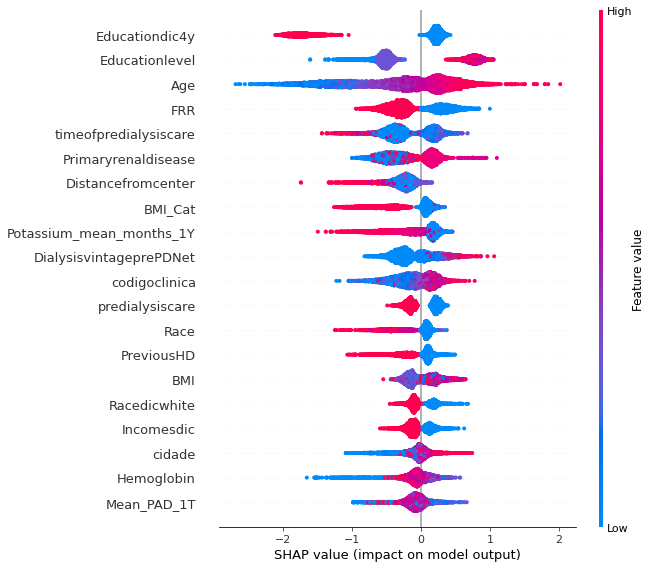

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup1y, mean accuracy: 0.6700523859152032, mean F1 score: 0.7333403012724141,
           mean Recall: 0.785259576033476, mean Precision: 0.6878607761279516


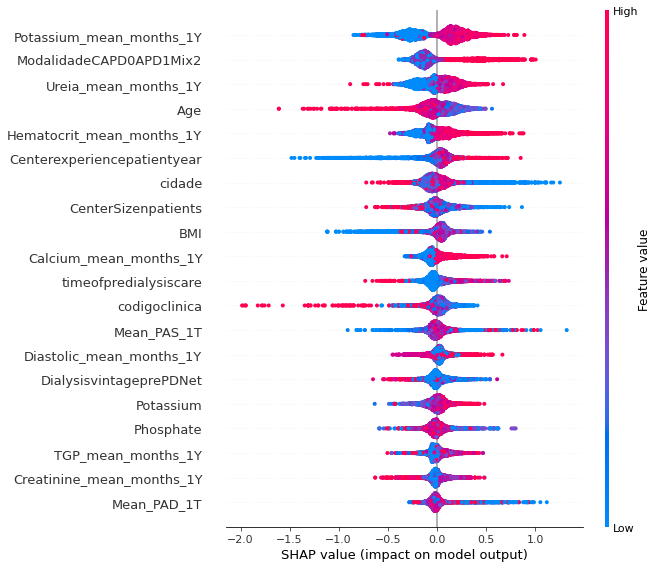

Target: Tech_event_1y, mean accuracy: 0.9477835370392826, mean F1 score: 0.01988515176374077,
           mean Recall: 0.010909090909090908, mean Precision: 0.11222222222222222


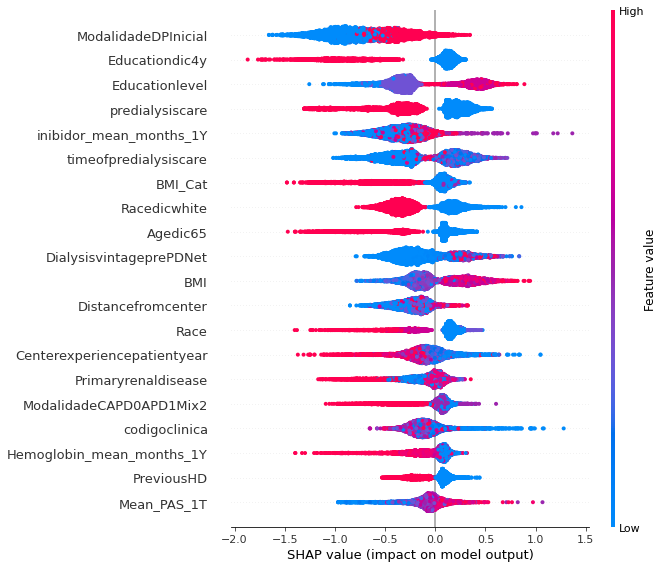

In [19]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    database = dfs[0].copy()
    X = database

    if target == "Followup1y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 12:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
        y_followup1y = y
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)

            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=8,
                min_child_weight=3)
            model.fit(X_train_sm, y_train_sm)
        
        else:
            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=8,
                min_child_weight=3)
            model.fit(X_train, y_train)
            
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

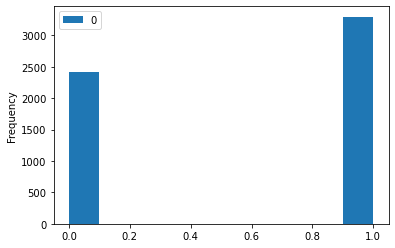

In [11]:
from matplotlib import pyplot as plt

plt.figure()
y_followup1y.plot.hist()

In [12]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_2y, mean accuracy: 0.9384023099133783, mean F1 score: 0.07549909255898365,
           mean Recall: 0.04262295081967213, mean Precision: 0.3301587301587302


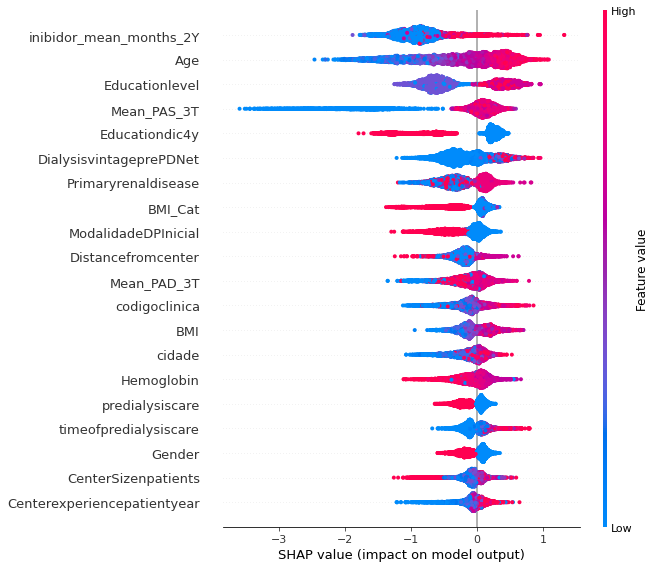

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup2y, mean accuracy: 0.7270211983262059, mean F1 score: 0.7230943674679492,
           mean Recall: 0.7403745808781224, mean Precision: 0.7066023910695448


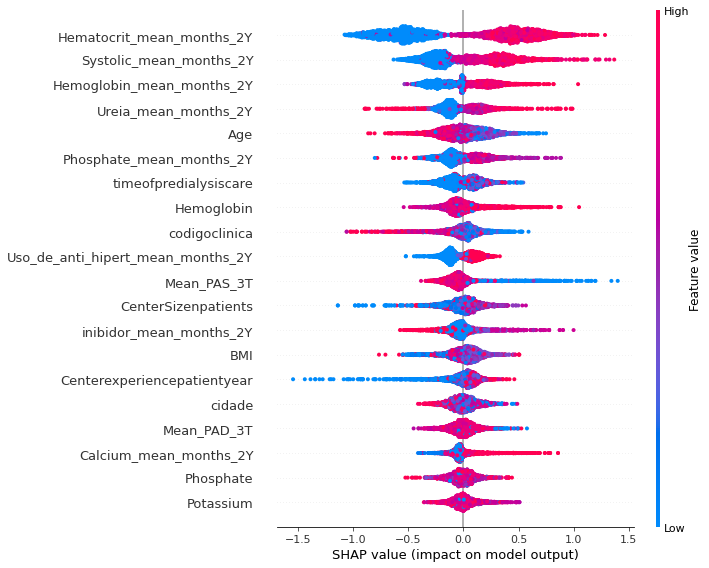

invalid value encountered in double_scalars


Target: Tech_event_2y, mean accuracy: 0.9606186286618517, mean F1 score: nan,
           mean Recall: 0.0, mean Precision: 0.0


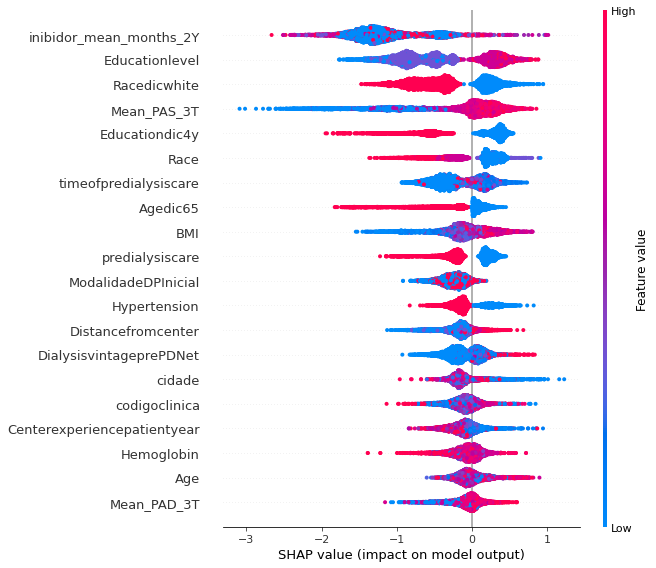

In [13]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] < 12].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 24:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
        y_followup2y = y
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

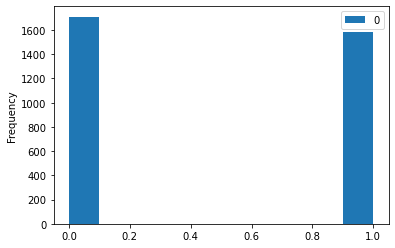

In [14]:
from matplotlib import pyplot as plt

plt.figure()
y_followup2y.plot.hist()

In [15]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_3y, mean accuracy: 0.9631901840490797, mean F1 score: 0.08121922368022888,
           mean Recall: 0.052043010752688176, mean Precision: 0.18484848484848487


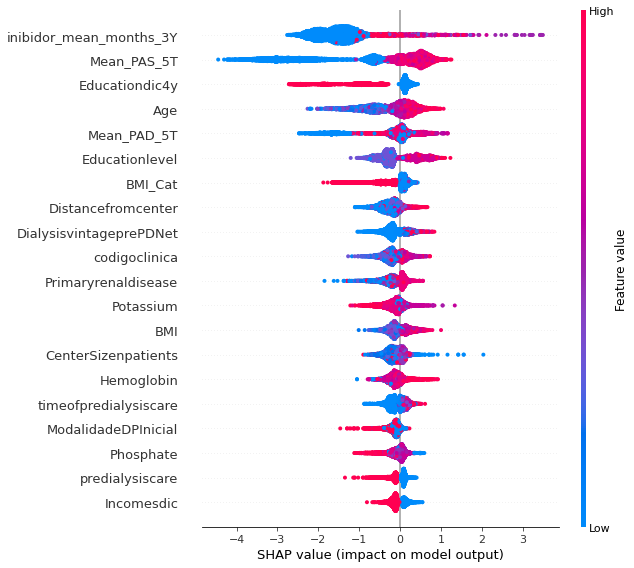

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup3y, mean accuracy: 0.7025851635815329, mean F1 score: 0.6697652762713977,
           mean Recall: 0.7025599128540304, mean Precision: 0.6398957271568737


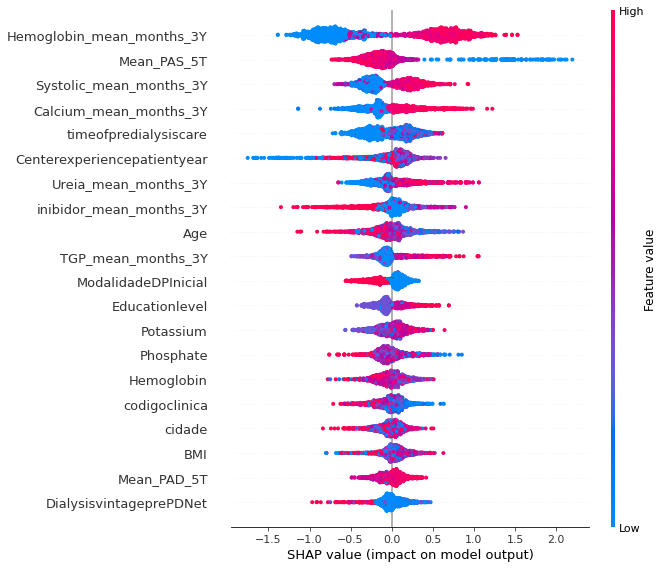

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Tech_event_3y, mean accuracy: 0.9806923541905217, mean F1 score: 0.019047619047619042,
           mean Recall: 0.01111111111111111, mean Precision: 0.06666666666666667


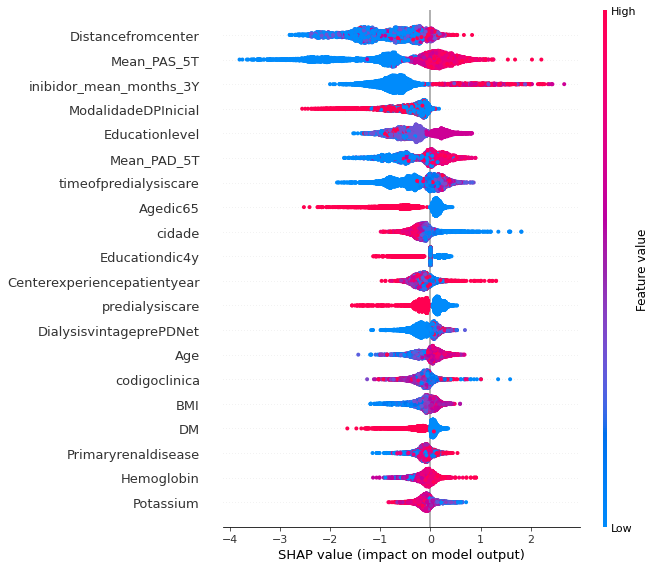

In [16]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup2y"] < 24)].index
#         print(len(indexNames))
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 36:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
        y_followup3y = y
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)    
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

In [17]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Predicting binary outcomes for events in different years (using neural networks):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [18]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    X = dfs[0].copy()

    if target == "Followup1y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 12:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
        
        if target != "Followup1y":
            history = model.fit(
                X_train_sm,
                y_train_sm,
                epochs=100,
                verbose=0
            )
        else:
            history = model.fit(
                X_train,
                y_train,
                epochs=100,
                verbose=0
            )
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.2023809523809524, Recall: 0.1650485436893204, Precision: 0.26153846153846155
F1 score: 0.17435897435897438, Recall: 0.1650485436893204, Precision: 0.18478260869565216
F1 score: 0.12021857923497267, Recall: 0.10784313725490197, Precision: 0.13580246913580246
F1 score: 0.22119815668202766, Recall: 0.23529411764705882, Precision: 0.20869565217391303
F1 score: 0.20095693779904308, Recall: 0.20588235294117646, Precision: 0.19626168224299065
Target: death_event_1y, mean accuracy: 0.861219687771964,
         mean F1 score: 0.18599515723109294, mean Recall: 0.1758233390443556, mean Precision: 0.197416174757364
F1 score: 0.5930331350892099, Recall: 0.5287878787878788, Precision: 0.6750483558994197
F1 score: 0.6765140324963073, Recall: 0.693939393939394, Precision: 0.659942363112392
F1 score: 0.6744186046511628, Recall: 0.7040971168437026, Precision: 0.6471408647140865
F1 score: 0.6481620405101276, Recall: 0.6555386949924128, Precision: 0.6409495548961425
F1 score: 0.6671826625386997

In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] < 12].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 24:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

        history = model.fit(
            X_train,
            y_train,
            epochs=100,
            verbose=0
        )      
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.12173913043478261, Recall: 0.11475409836065574, Precision: 0.12962962962962962
F1 score: 0.09259259259259259, Recall: 0.08196721311475409, Precision: 0.10638297872340426
F1 score: 0.07594936708860758, Recall: 0.04918032786885246, Precision: 0.16666666666666666
F1 score: 0.10416666666666667, Recall: 0.08196721311475409, Precision: 0.14285714285714285
F1 score: 0.1923076923076923, Recall: 0.16393442622950818, Precision: 0.23255813953488372
Target: death_event_2y, mean accuracy: 0.9149181905678537,
         mean F1 score: 0.1205355087901966, mean Recall: 0.09836065573770492, mean Precision: 0.1556189114823454
F1 score: 0.6306027820710973, Recall: 0.6415094339622641, Precision: 0.6200607902735562
F1 score: 0.6787878787878788, Recall: 0.7044025157232704, Precision: 0.6549707602339181
F1 score: 0.6505636070853462, Recall: 0.637223974763407, Precision: 0.6644736842105263
F1 score: 0.5876106194690265, Recall: 0.5236593059936908, Precision: 0.6693548387096774
F1 score: 0.68515497553

In [20]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup2y"] < 24)].index
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 36:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)    
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

        history = model.fit(
            X_train,
            y_train,
            epochs=100,
            verbose=0
        )
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.04347826086956522, Recall: 0.03333333333333333, Precision: 0.0625
F1 score: 0.09090909090909091, Recall: 0.06666666666666667, Precision: 0.14285714285714285
F1 score: 0.0392156862745098, Recall: 0.03225806451612903, Precision: 0.05
F1 score: 0.19047619047619047, Recall: 0.12903225806451613, Precision: 0.36363636363636365
F1 score: 0.17857142857142855, Recall: 0.16129032258064516, Precision: 0.2
Target: death_event_3y, mean accuracy: 0.9564417177914111,
         mean F1 score: 0.11150064743073336, mean Recall: 0.08451612903225807, mean Precision: 0.1637987012987013
F1 score: 0.6405693950177936, Recall: 0.6617647058823529, Precision: 0.6206896551724138
F1 score: 0.6510067114093959, Recall: 0.7132352941176471, Precision: 0.5987654320987654
F1 score: 0.5923076923076923, Recall: 0.5703703703703704, Precision: 0.616
F1 score: 0.6305084745762712, Recall: 0.6838235294117647, Precision: 0.5849056603773585
F1 score: 0.5878136200716846, Recall: 0.6029411764705882, Precision: 0.5734265

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


F1 score: 0.0, Recall: 0.0, Precision: 0.0
F1 score: 0.0, Recall: 0.0, Precision: 0.0
F1 score: 0.0, Recall: 0.0, Precision: 0.0
F1 score: 0.03773584905660377, Recall: 0.05555555555555555, Precision: 0.02857142857142857
Target: Tech_event_3y, mean accuracy: 0.9692206267200654,
         mean F1 score: 0.007547169811320756, mean Recall: 0.01111111111111111, mean Precision: 0.005714285714285714


# Predicting binary outcomes for events in different years (using Dummy Classifier):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    X = dfs[0].copy()

    if target == "Followup1y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 12:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train dummy classifier model
        model = DummyClassifier(strategy="stratified")      
        if target != "Followup1y":
            model.fit(X_train_sm, y_train_sm)
        else:
            model.fit(X_train, y_train)
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.1475903614457831, Recall: 0.47572815533980584, Precision: 0.0873440285204991
F1 score: 0.1791044776119403, Recall: 0.5825242718446602, Precision: 0.10582010582010581
F1 score: 0.121580547112462, Recall: 0.39215686274509803, Precision: 0.07194244604316546
F1 score: 0.14618973561430793, Recall: 0.46078431372549017, Precision: 0.08687615526802218
F1 score: 0.16983894582723277, Recall: 0.5686274509803921, Precision: 0.09982788296041308
Target: death_event_1y, mean accuracy: 0.5076208997238727,
         mean F1 score: 0.15287179422525846, mean Recall: 0.49596421092708926, mean Precision: 0.09036212372244112
F1 score: 0.5889570552147239, Recall: 0.5818181818181818, Precision: 0.5962732919254659
F1 score: 0.5983167559296098, Recall: 0.5924242424242424, Precision: 0.6043276661514683
F1 score: 0.5887850467289719, Recall: 0.5735963581183612, Precision: 0.6048
F1 score: 0.5592055003819709, Recall: 0.5553869499241275, Precision: 0.563076923076923
F1 score: 0.6000000000000001, Recall: 0

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] < 12].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 24:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
       
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train dummy classifier model
        model = DummyClassifier(strategy="stratified")      
        model.fit(X_train_sm, y_train_sm)
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.11532125205930806, Recall: 0.5737704918032787, Precision: 0.0641025641025641
F1 score: 0.11647254575707155, Recall: 0.5737704918032787, Precision: 0.06481481481481481
F1 score: 0.10398613518197573, Recall: 0.4918032786885246, Precision: 0.05813953488372093
F1 score: 0.08934707903780069, Recall: 0.4262295081967213, Precision: 0.04990403071017274
F1 score: 0.12587412587412586, Recall: 0.5901639344262295, Precision: 0.07045009784735812
Target: death_event_2y, mean accuracy: 0.49663137632338783,
         mean F1 score: 0.11020750771965805, mean Recall: 0.5311475409836065, mean Precision: 0.06148220847172614
F1 score: 0.48606811145510836, Recall: 0.4937106918238994, Precision: 0.47865853658536583
F1 score: 0.5015479876160991, Recall: 0.5094339622641509, Precision: 0.49390243902439024
F1 score: 0.4945226917057903, Recall: 0.49842271293375395, Precision: 0.4906832298136646
F1 score: 0.46769230769230763, Recall: 0.4794952681388013, Precision: 0.45645645645645644
F1 score: 0.4745762

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup2y"] < 24)].index
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 36:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)  
       
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train dummy classifier model
        model = DummyClassifier(strategy="stratified")      
        model.fit(X_train_sm, y_train_sm)
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.05394990366088632, Recall: 0.4666666666666667, Precision: 0.028629856850715747
F1 score: 0.06037735849056604, Recall: 0.5333333333333333, Precision: 0.032
F1 score: 0.06640625000000001, Recall: 0.5483870967741935, Precision: 0.035343035343035345
F1 score: 0.046242774566473986, Recall: 0.3870967741935484, Precision: 0.02459016393442623
F1 score: 0.05597014925373134, Recall: 0.4838709677419355, Precision: 0.0297029702970297
Target: death_event_3y, mean accuracy: 0.4952965235173824,
         mean F1 score: 0.05659151403355648, mean Recall: 0.4838709677419355, mean Precision: 0.030053205285041407
F1 score: 0.488135593220339, Recall: 0.5294117647058824, Precision: 0.4528301886792453
F1 score: 0.4569536423841059, Recall: 0.5073529411764706, Precision: 0.41566265060240964
F1 score: 0.4677966101694915, Recall: 0.5111111111111111, Precision: 0.43125
F1 score: 0.46366782006920415, Recall: 0.49264705882352944, Precision: 0.43790849673202614
F1 score: 0.5095541401273886, Recall: 0.5882